# Classification playground

Put your imports here.

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime as dt

from dataset_util import uci_mhealth
from dataset_util.extract_input_features import all_feature, extract_features
import matplotlib.pyplot as plt

from config import SQLITE_DATABASE_FILE
from evaluate_classification import evaluation_metrics
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Load dataset from sqlite database.

Make sure you have downloaded the raw datasets and loaded them into the database by running:
```
python rawdataset.py
python load_dataset.py
```

In [2]:
with sqlite3.connect(SQLITE_DATABASE_FILE) as conn:
    # features = pd.read_sql_query(uci_mhealth.raw_table_valid_data_query, conn)
    global sliding_windows, subject_ids, activity_ids
    sliding_windows = uci_mhealth.to_sliding_windows(conn)
    subject_ids = uci_mhealth.get_subject_ids(conn)
    activity_ids = uci_mhealth.get_activity_ids(conn)
    activity_ids.sort()

Now we can play with it.

features extracted
training set and test set ready
training set: (2380, 322)
test set: (1047, 322)

classifier result
--------------------------------------------------
activity  1
sensitivity:	 99.89539748953975
specificity:	 100.0
auc:	 1.0
--------------------------------------------------
activity  2
sensitivity:	 100.0
specificity:	 98.91304347826087
auc:	 0.9999430912815843
--------------------------------------------------
activity  3
sensitivity:	 100.0
specificity:	 100.0
auc:	 1.0
--------------------------------------------------
activity  4
sensitivity:	 99.68553459119497
specificity:	 100.0
auc:	 0.999977457676788
--------------------------------------------------
activity  5
sensitivity:	 100.0
specificity:	 95.65217391304348
auc:	 1.0
--------------------------------------------------
activity  6
sensitivity:	 99.79057591623037
specificity:	 100.0
auc:	 0.9998975643068518
--------------------------------------------------
activity  7
sensitivity:	 100.0
specificity:	 98.

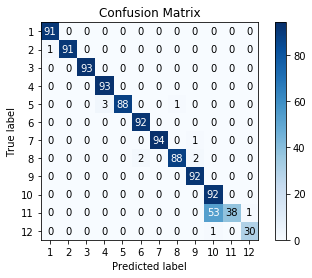

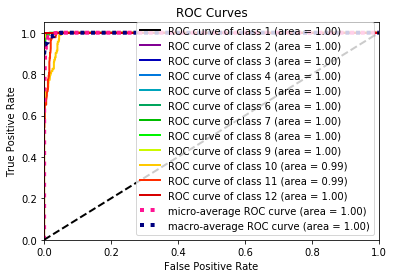

In [3]:
TRAINING_SET_PROPORTION = 0.7

features = extract_features(sliding_windows, all_feature)
print("features extracted")

n_subs = len(subject_ids)
n_training = round(n_subs * TRAINING_SET_PROPORTION)
# n_test = n_subs - n_training
idx = np.isin(features.loc[:,"subject_id"], subject_ids[:n_training])
training_set = features[idx]
test_set = features[np.logical_not(idx)]
train_X, train_y = uci_mhealth.to_classification(training_set)
test_X, test_y = uci_mhealth.to_classification(test_set)
print("training set and test set ready")
print("training set:", np.shape(train_X))
print("test set:", np.shape(test_X))

clsf = RandomForestClassifier(n_estimators=500, class_weight="balanced", n_jobs=-1)
clsf.fit(train_X,train_y)
RF_pred = clsf.predict(test_X)
pred_probability = clsf.predict_proba(test_X)

evaluation_metrics(test_y,RF_pred, pred_probability)

plot_confusion_matrix(test_y, RF_pred)
plot_roc(test_y, pred_probability)